In [74]:
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import NMF
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords

In [75]:
df=pd.read_csv('clean_abstract_clinton')

In [76]:
df

,abstract,date
0,pres and mrs clinton hold millennium party at ...,2000-01-02 05:00:00+00:00
1,for much of his presidency bill clintons own a...,2000-01-03 05:00:00+00:00
2,as the first of two moving trucks turned onto ...,2000-01-05 05:00:00+00:00
3,it is a reality of modern campaigns that conte...,2000-01-05 05:00:00+00:00
4,clinton pushes peace talks president clinton ...,2000-01-05 05:00:00+00:00
...,...,...
16436,a new gender policy council will look differen...,2021-02-16 18:27:12+00:00
16437,nearly three decades after the white house est...,2021-02-16 18:27:23+00:00
16438,with a following of million and a divisive st...,2021-02-17 17:35:38+00:00
16439,rush limbaugh made the gop the party of misogyny,2021-02-20 11:55:04+00:00


#### Stopword list

In [77]:
stopword_list=stopwords.words('english')

In [78]:
stopword_list.extend(['could','many','even','also','make','whether','least','called','keep','said','says', 'say',
                      'hillary','clinton','clintons','rodham','mr','ms','mrs','would','us','united', 'states',
                      'way','people','year','years','new','two','three','first','day','white', 'house','one',
                     'business','international','national','bulk','receiving','orders','among','photo','photos',
                     'monday','tuesday','wednesday','thursday','friday','saturday','sunday','news',
                      'bookstores','bookstore','indicates','expanded','include','billion','million',
                      'next','since','last','court','time','may','group','week', 'weather', 'editorial', 'yorkregion', 'obituaries', 'editorials'])

In [79]:
stopword_list

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [80]:
df['abstract']=df['abstract'].astype(str)

In [81]:
df['date']=pd.to_datetime(df['date'])

#### Replace words with 'root'

In [82]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('iraqis','iraq'))

In [83]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('iraqi','iraq'))

In [84]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('democrats','democrat'))

In [85]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('democratic','democrat'))

In [86]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('republicans','republican'))

In [87]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('israeli','israel'))

In [88]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('barack obama','obama'))

In [89]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('obamas','obama'))

In [90]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('george w bush','bush'))

In [91]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('president bush','bush'))

In [92]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('york city','yorkcity'))

In [93]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('york state','yorkstate'))

In [94]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('john mccain','mccain'))

In [95]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('bernie sanders','sanders'))

In [96]:
df['abstract']=df['abstract'].apply(lambda x: x.replace(' sen ','senator'))

In [97]:
df['abstract']=df['abstract'].apply(lambda x: x.replace(' pres ','president'))

In [98]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('john kerry','kerry'))

In [99]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('john podesta','podesta'))

In [100]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('candidates','candidate'))

In [101]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('partys','party'))

In [102]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('voters','vote'))

In [103]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('voter','vote'))

In [104]:
df['abstract']=df['abstract'].apply(lambda x: x.replace(' gov ','governor'))

In [105]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('weeks','week'))

In [106]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('rudolph giuliani','giuliani'))

In [107]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('rudolph','giuliani'))

In [108]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('rick lazio','lazio'))

In [109]:
df['abstract']=df['abstract'].apply(lambda x: x.replace(' rep ','representative'))

In [110]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('representatives','representative'))

In [111]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('running','run'))

In [112]:
df['abstract']=df['abstract'].apply(lambda x: x.replace('run','race'))

#### Count Vectorize

In [113]:
vectorizer = CountVectorizer(stop_words=stopword_list, ngram_range=(1, 1))

In [114]:
doc_word = vectorizer.fit_transform(df['abstract'].values.astype('U'))

In [115]:
doc_word.shape

(16441, 26332)

#### NMF model - 3 topics

In [116]:
nmf_model = NMF(3, max_iter=300)
doc_topic = nmf_model.fit_transform(doc_word)

In [117]:
def display_topics(model, feature_names, no_top_words, topic_names=None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic ", ix)
        else:
            print("\nTopic: '",topic_names[ix],"'")
        print(", ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

In [118]:
display_topics(nmf_model, vectorizer.get_feature_names(), 35)


Topic  0
democrat, republican, candidate, campaign, party, race, senate, presidential, york, vote, political, nomination, giuliani, primary, money, lazio, state, mayor, committee, election, convention, pataki, debate, john, governor, support, pirro, general, attorney, reelection, yorkstate, fundraising, former, leaders, bill

Topic  1
iraq, bush, american, state, federal, officials, president, government, administration, security, war, former, nations, plan, york, political, senate, republican, public, israel, world, vote, oil, secretary, health, attacks, killed, foreign, city, iran, nuclear, congress, military, north, chief

Topic  2
senator, obama, president, campaign, former, presidential, washington, race, mccain, bill, primary, secretary, supporters, state, nomination, sanders, vote, made, night, pennsylvania, fight, support, victory, might, carolina, speech, hampshire, rival, advisers, iowa, vice, primaries, presidentelect, candidacy, convention


In [119]:
doc_topic = pd.DataFrame(doc_topic.round(3),
             columns = ["component_1","component_2","component_3"])
doc_topic

,component_1,component_2,component_3
0,0.027,0.009,0.000
1,0.028,0.052,0.024
2,0.000,0.047,0.027
3,0.132,0.148,0.036
4,0.000,0.063,0.030
...,...,...,...
16436,0.000,0.034,0.029
16437,0.003,0.053,0.013
16438,0.000,0.031,0.000
16439,0.022,0.004,0.000


#### Break down dataframe by year

In [120]:
df.loc[:,'year']=df['date'].apply(lambda x: x.year)

In [54]:
df

,abstract,date,year
0,pres and mrs clinton hold millennium party at ...,2000-01-02 05:00:00+00:00,2000
1,for much of his presidency bill clintons own a...,2000-01-03 05:00:00+00:00,2000
2,as the first of two moving trucks turned onto ...,2000-01-05 05:00:00+00:00,2000
3,it is a reality of modern campaigns that conte...,2000-01-05 05:00:00+00:00,2000
4,clinton pushes peace talks president clinton ...,2000-01-05 05:00:00+00:00,2000
...,...,...,...
16436,a new gender policy council will look differen...,2021-02-16 18:27:12+00:00,2021
16437,nearly three decades after the white house est...,2021-02-16 18:27:23+00:00,2021
16438,with a following of million and a divisive st...,2021-02-17 17:35:38+00:00,2021
16439,rush limbaugh made the gop the party of misogyny,2021-02-20 11:55:04+00:00,2021


#### Make Graph of average of all components by year 

In [121]:
doc_topic_year=pd.concat([doc_topic, df['year']],axis=1)

In [122]:
doc_topic_year

,component_1,component_2,component_3,year
0,0.027,0.009,0.000,2000
1,0.028,0.052,0.024,2000
2,0.000,0.047,0.027,2000
3,0.132,0.148,0.036,2000
4,0.000,0.063,0.030,2000
...,...,...,...,...
16436,0.000,0.034,0.029,2021
16437,0.003,0.053,0.013,2021
16438,0.000,0.031,0.000,2021
16439,0.022,0.004,0.000,2021


In [145]:
df_avg=doc_topic_year.groupby('year')[['component_1','component_2','component_3']].mean().reset_index()

In [146]:
df_avg

,year,component_1,component_2,component_3
0,2000,0.071110,0.039122,0.011818
1,2001,0.041303,0.058716,0.010680
2,2002,0.055491,0.057461,0.005683
3,2003,0.035340,0.062165,0.009959
4,2004,0.064000,0.057338,0.014098
5,2005,0.069243,0.132500,0.040085
6,2006,0.065545,0.043717,0.040690
7,2007,0.032233,0.016153,0.047482
8,2008,0.030687,0.010064,0.074746
9,2009,0.009321,0.034280,0.033856


In [147]:
df_avg['year']

0     2000
1     2001
2     2002
3     2003
4     2004
5     2005
6     2006
7     2007
8     2008
9     2009
10    2010
11    2011
12    2012
13    2013
14    2014
15    2015
16    2016
17    2017
18    2018
19    2019
20    2020
21    2021
Name: year, dtype: int64

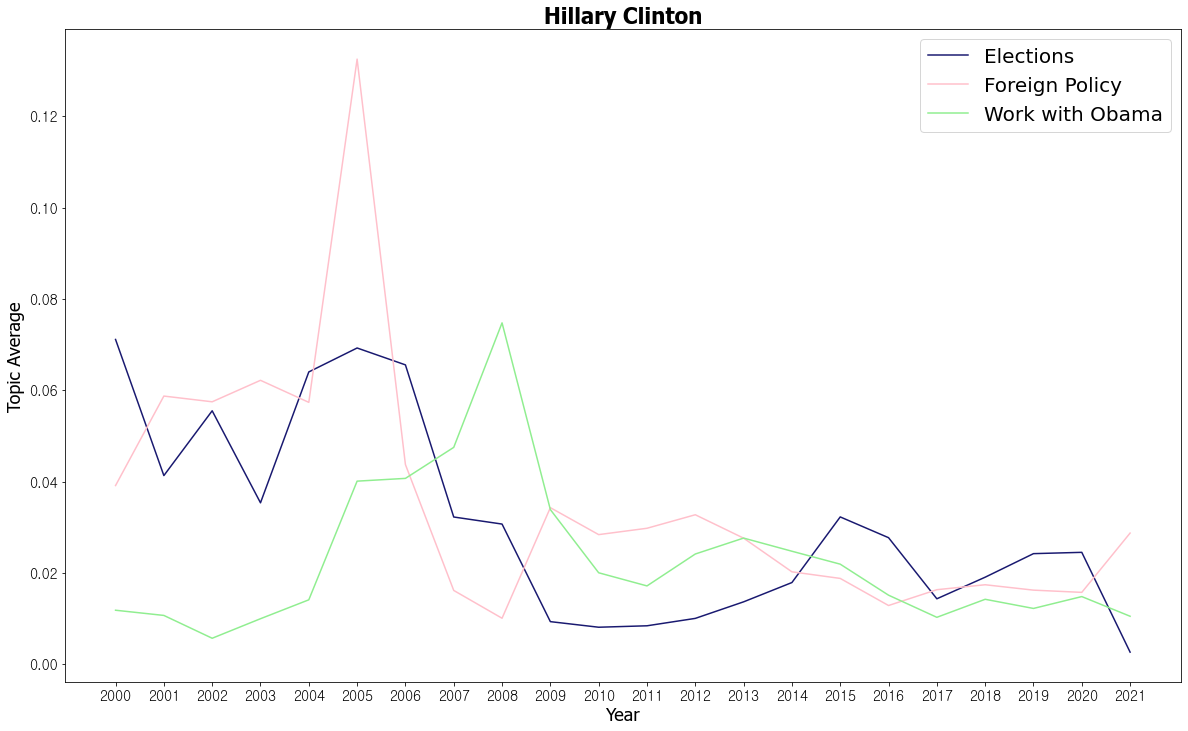

In [153]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_avg['year'],df_avg['component_1'],color='midnightblue', label="Elections");
ax.plot(df_avg['year'],df_avg['component_2'],color='pink', label='Foreign Policy');
ax.plot(df_avg['year'],df_avg['component_3'],color='lightgreen', label='Work with Obama');
#ax.plot(df_topic_3['year'],df_topic_3['freq'],color='coral', label='Foreign Policy');
#ax.plot(df_topic_4['year'],df_topic_4['freq'],color='pink',label='Fiscal Policy');
plt.xlabel("Year", **tfont)
plt.ylabel("Topic Average", **tfont)
plt.title('Hillary Clinton', **tbfont)
plt.xticks(df_count['year'])
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.legend(prop={'size': 20})
plt.savefig('topic_clinton_avg.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();

#### Make graph of counts 

In [55]:
df_count=df.groupby('year')['year'].count().to_frame(name='count').reset_index()

In [56]:
df_count

,year,count
0,2000,908
1,2001,641
2,2002,375
3,2003,394
4,2004,396
5,2005,540
6,2006,884
7,2007,1808
8,2008,2740
9,2009,911


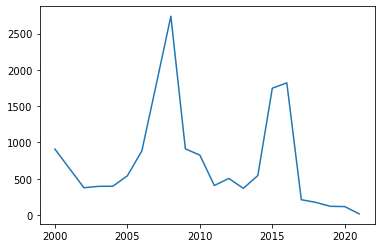

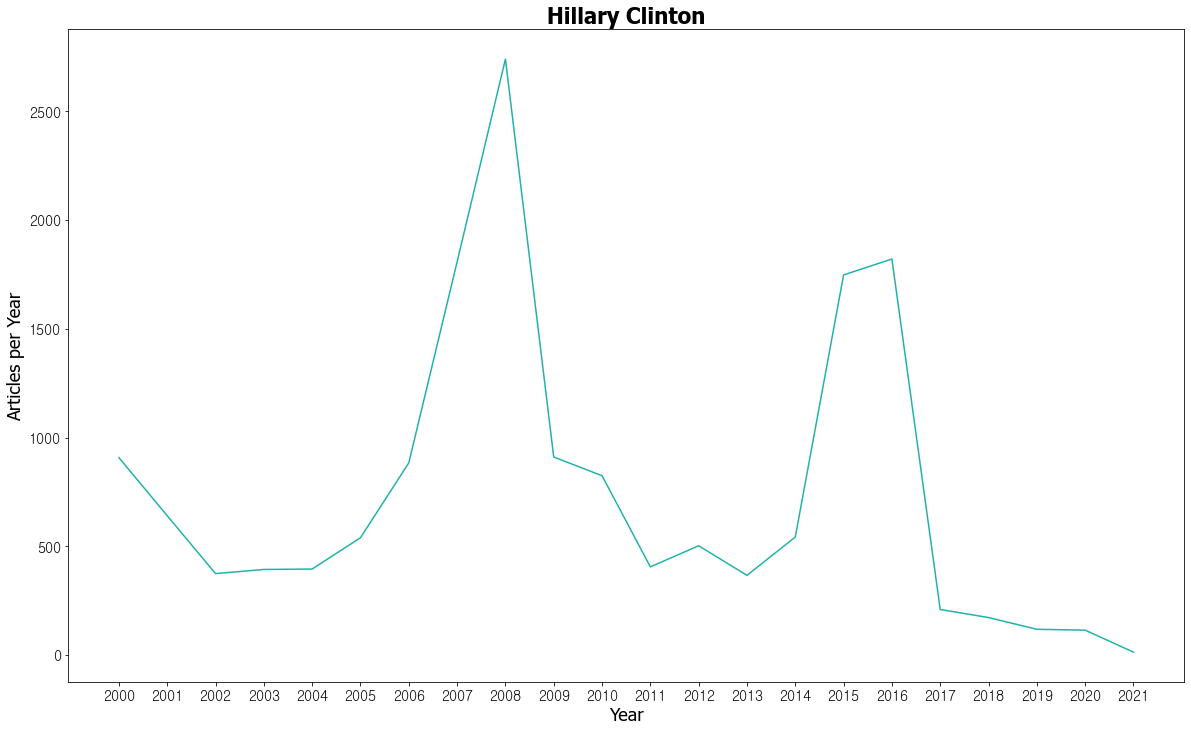

In [55]:
plt.plot(df_count['year'],df_count['count'])

gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_count['year'],df_count['count'],color='lightseagreen');
plt.xlabel("Year", **tfont)
plt.ylabel("Articles per Year", **tfont)
plt.title('Hillary Clinton', **tbfont)
plt.xticks(df_count['year'])
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.savefig('articles_count_clinton.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();

#### Break down dataframe by year to apply topic

In [57]:
dict_of_df={}
for x in range(2000,2022):
    dict_of_df["df_{}".format(x)]=df[df['year']==x]

In [59]:
dict_df_topic_freq={}
for x in range(2000,2022):
    df=vectorizer.transform(dict_of_df["df_{}".format(x)]['abstract'].values.astype('U'))
    doc_topic = nmf_model.transform(df)
    doc_topic = pd.DataFrame(doc_topic.round(3),
             columns = ["component_1","component_2","component_3"])
    doc_topic['doctopic']=doc_topic.idxmax(axis=1)
    topic_freq=doc_topic.groupby('doctopic')['doctopic'].count().to_frame(name='count').reset_index()
    topic_freq['freq']=topic_freq['count']/topic_freq['count'].sum()
    topic_freq['year']=x
    dict_df_topic_freq["df_{}".format(x)]=topic_freq

In [60]:
df_tf=dict_df_topic_freq['df_2000']

In [61]:
for x in range(2001,2022):
    df_tf=df_tf.append(dict_df_topic_freq['df_{}'.format(x)], ignore_index=True)

In [62]:
df_tf.sort_values(by=['doctopic','year'], inplace=True)

In [65]:
df_tf

,doctopic,count,freq,year
0,component_1,564,0.621145,2000
3,component_1,169,0.263651,2001
6,component_1,127,0.338667,2002
9,component_1,88,0.223350,2003
12,component_1,152,0.383838,2004
...,...,...,...,...
50,component_3,205,0.112576,2016
53,component_3,23,0.109524,2017
56,component_3,22,0.127168,2018
59,component_3,12,0.100840,2019


In [63]:
df_topic_1=df_tf[df_tf["doctopic"]=='component_1']
df_topic_1

,doctopic,count,freq,year
0,component_1,564,0.621145,2000
3,component_1,169,0.263651,2001
6,component_1,127,0.338667,2002
9,component_1,88,0.223350,2003
12,component_1,152,0.383838,2004
15,component_1,222,0.411111,2005
18,component_1,387,0.437783,2006
21,component_1,665,0.367810,2007
24,component_1,738,0.269343,2008
27,component_1,97,0.106476,2009


In [64]:
df_topic_2=df_tf[df_tf["doctopic"]=='component_2']
df_topic_2

,doctopic,count,freq,year
1,component_2,323,0.355727,2000
4,component_2,447,0.697348,2001
7,component_2,241,0.642667,2002
10,component_2,290,0.736041,2003
13,component_2,227,0.573232,2004
16,component_2,252,0.466667,2005
19,component_2,287,0.324661,2006
22,component_2,548,0.303097,2007
25,component_2,619,0.225912,2008
28,component_2,535,0.587267,2009


In [66]:
df_topic_3=df_tf[df_tf["doctopic"]=='component_3']
df_topic_3

,doctopic,count,freq,year
2,component_3,21,0.023128,2000
5,component_3,25,0.039002,2001
8,component_3,7,0.018667,2002
11,component_3,16,0.040609,2003
14,component_3,17,0.042929,2004
17,component_3,66,0.122222,2005
20,component_3,210,0.237557,2006
23,component_3,595,0.329093,2007
26,component_3,1383,0.504745,2008
29,component_3,279,0.306257,2009


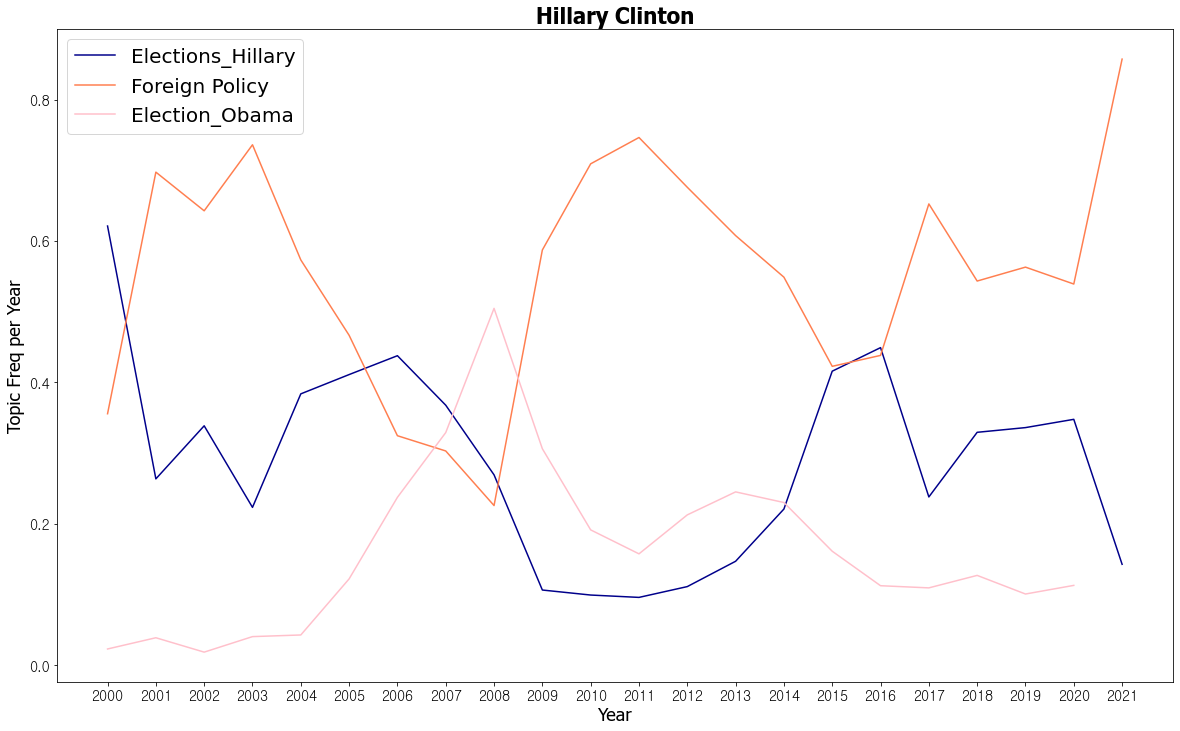

In [68]:
gfont = {'fontname':'Gulim','size': 14}
tfont = {'fontname':'Tahoma','size': 18}
tbfont = {'fontname':'Tahoma','weight':'bold','size': 22}
fig, ax = plt.subplots(figsize=(20,12))
ax.plot(df_topic_1['year'],df_topic_1['freq'],color='darkblue', label="Elections_Hillary");
ax.plot(df_topic_2['year'],df_topic_2['freq'],color='coral', label='Foreign Policy');
ax.plot(df_topic_3['year'],df_topic_3['freq'],color='pink', label='Election_Obama');
#ax.plot(df_topic_3['year'],df_topic_3['freq'],color='coral', label='Foreign Policy');
#ax.plot(df_topic_4['year'],df_topic_4['freq'],color='pink',label='Fiscal Policy');
plt.xlabel("Year", **tfont)
plt.ylabel("Topic Freq per Year", **tfont)
plt.title('Hillary Clinton', **tbfont)
plt.xticks(df_count['year'])
plt.xticks(**gfont)
plt.yticks(**gfont)
plt.legend(prop={'size': 20})
#plt.savefig('topic_clinton.png',bbox_inches='tight',facecolor='white', edgecolor='white')
plt.show();
